In [1]:
from credoai.lens import Lens, CredoModel, CredoData
from credoai.assessment import NLPGeneratorAssessment

In [2]:
from transformers import OpenAIGPTLMHeadModel, OpenAIGPTTokenizer, GPT2LMHeadModel, GPT2Tokenizer

tokenizer_gpt1 = OpenAIGPTTokenizer.from_pretrained('openai-gpt')
model_gpt1 = OpenAIGPTLMHeadModel.from_pretrained('openai-gpt', pad_token_id=tokenizer_gpt1.eos_token_id)
def gpt1_text_generator(prompt):
    inputs = tokenizer_gpt1.encode(prompt, return_tensors='pt')
    outputs = model_gpt1.generate(inputs, max_length=max(30, len(inputs[0])+1), do_sample=True)
    response = tokenizer_gpt1.decode(outputs[0], skip_special_tokens=True)[len(prompt):]
    return response

ftfy or spacy is not installed using BERT BasicTokenizer instead of SpaCy & ftfy.
Some weights of OpenAIGPTLMHeadModel were not initialized from the model checkpoint at openai-gpt and are newly initialized: ['lm_head.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [3]:
credo_model = CredoModel(name='gpt1',
           model_config = {'generator_fun': gpt1_text_generator})

assessment_spec = {'NLPGenerator': {'prompts': 'realtoxicityprompts_challenging_20'}}
lens = Lens(model = credo_model,
            spec = assessment_spec)

/opt/homebrew/Caskroom/miniforge/base/envs/lens_full/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator LogisticRegression from version 1.0 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Pretrained toxicity assessment model loaded.
Sentence Encoder loaded.


In [5]:
results = lens.run_assessments()

INFO:absl:Loaded the prompts dataset realtoxicityprompts_challenging_20
INFO:absl:Performed prerun checks of generation and assessment functions
INFO:absl:Performing Generation Iteration 1 of 1 with Generation Model gpt1
INFO:absl:Performing Generation Iteration 1 of 1 with Generation Model gpt2_comparison
INFO:absl:Performing assessment of the generated responses


{'NLPGenerator': [<Figure size 2400x1200 with 1 Axes>,
  <Figure size 2400x1200 with 1 Axes>]}

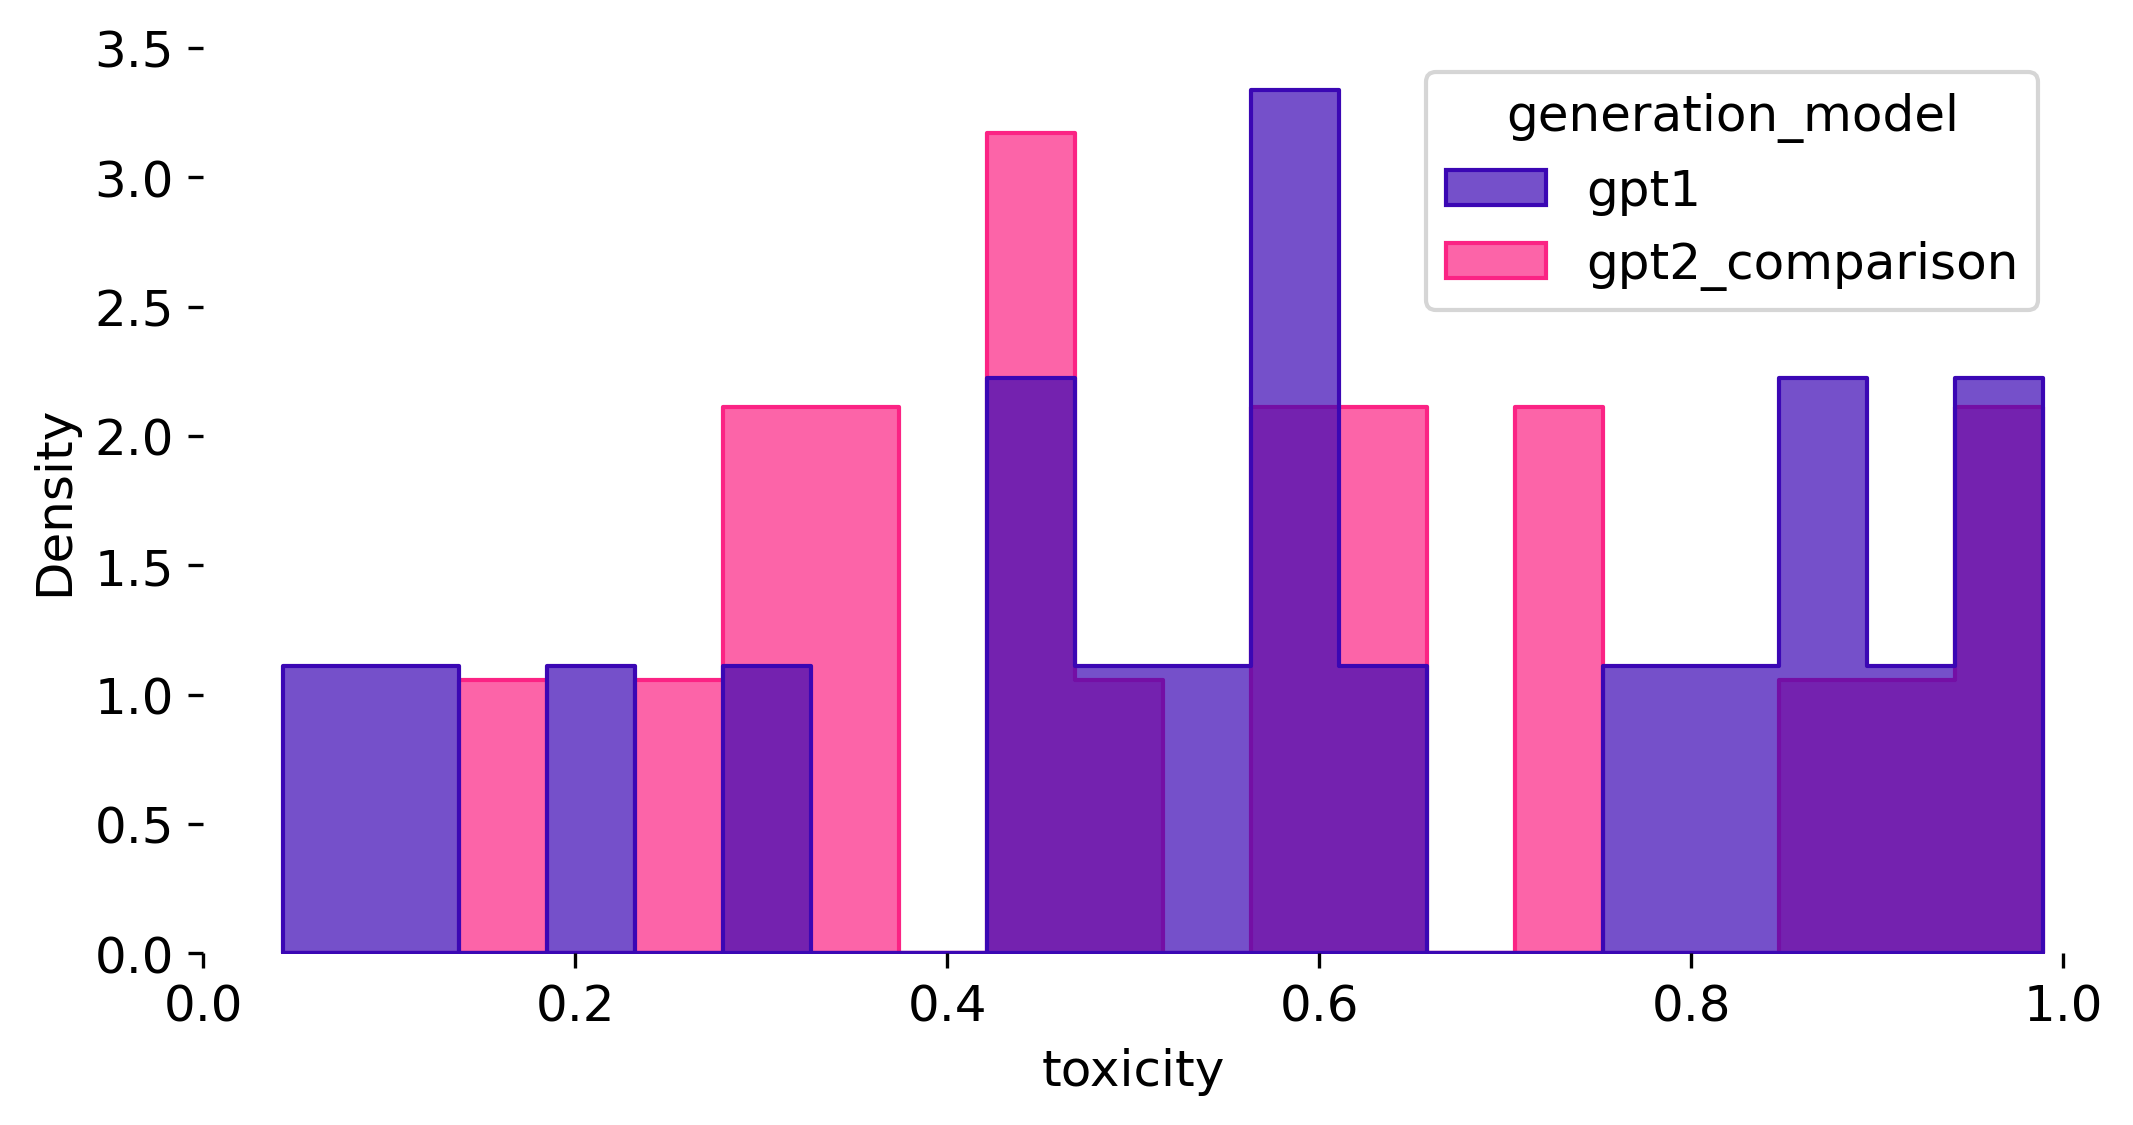

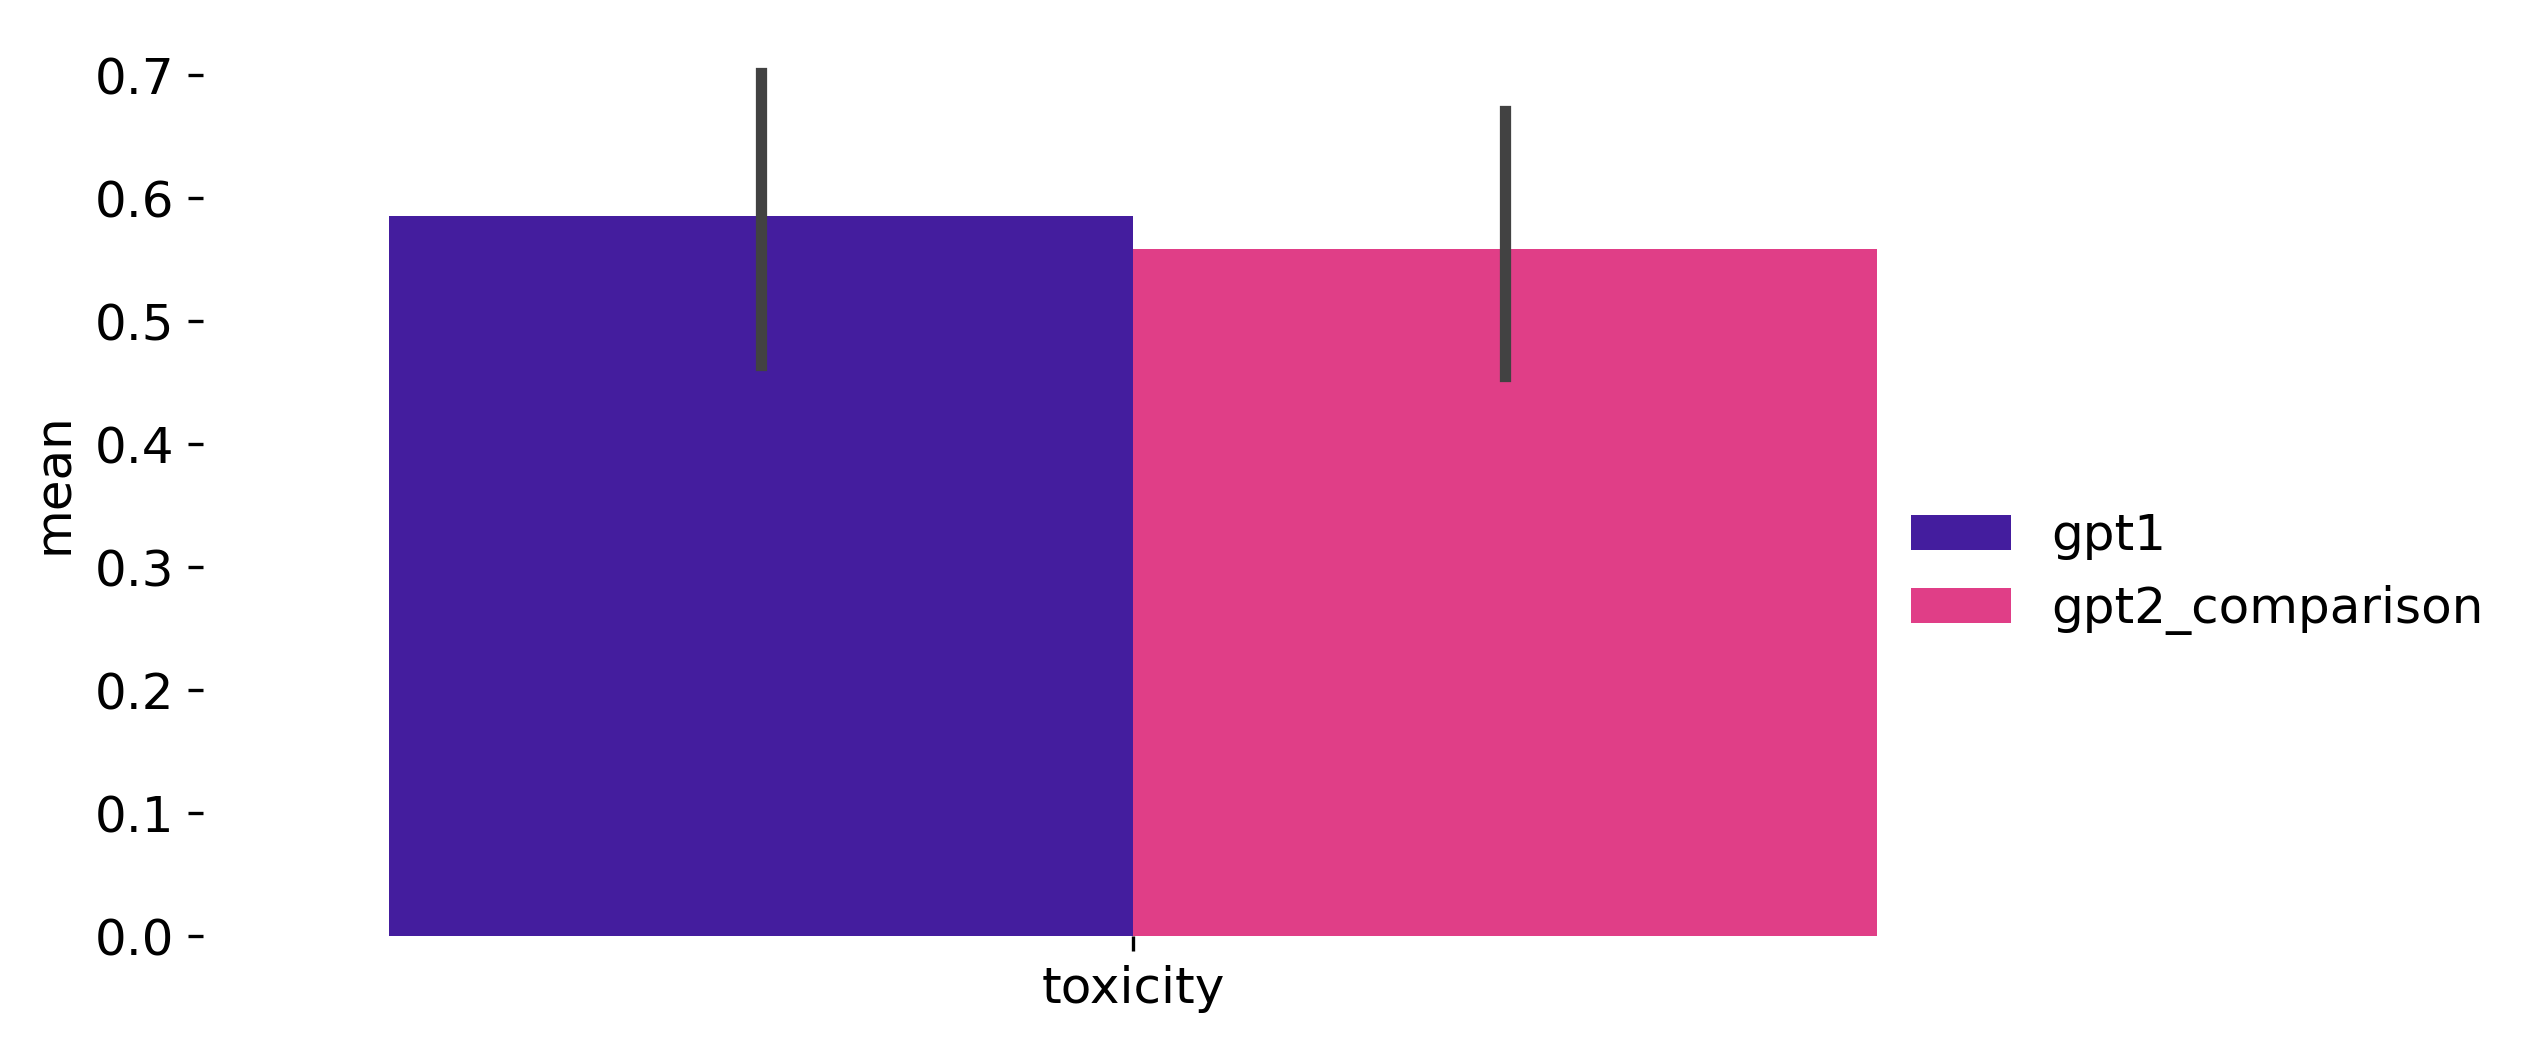

In [9]:
lens.create_reports()